In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

# Regular EDA and plotting libraries

In [ ]:
%%capture
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%%capture
!pip install compress_fasttext

In [ ]:
import compress_fasttext

In [ ]:
small_model = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/gensim-4-draft/geowac_tokens_sg_300_5_2020-100K-20K-100.bin'
)

# we want our plot to appear inside the notebook

In [ ]:
%matplotlib inline

import os
# Models from sklearn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import Pool

# Model Evaluations
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay as plot_roc_curve
from sklearn.preprocessing import OneHotEncoder
import catboost

## Load data

In [ ]:
os.chdir('/content/drive/My Drive/')

In [71]:
df = pd.read_csv("/content/drive/MyDrive/data_vacancies.csv")

In [ ]:
df.city_id

0          2
1          2
2          2
3          1
4         57
        ... 
19484      1
19485      1
19486      1
19487      2
19488    102
Name: city_id, Length: 19489, dtype: int64

In [ ]:
#id,name
#1,Москва
#2,Санкт-Петербург
#3,Екатеринбург
#6,Ростов-на-Дону
#10,Пермь
#16,Краснодар
#36,Ижевск
#57,Московская область
#174,Оренбургская область
#268,Курганская область

In [72]:
rosstat_df = pd.read_csv("/content/drive/MyDrive/nlp_hw2/itmo rosstat.csv", sep = ';')
rosstat_df

,city_id,total_inc,total_real_inc,person_inc,cons_expend,delta_savings,perc_goods_services,perc_poor,living_wage,middle_qualif_salary,population
0,1,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177
1,2,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,5600044
2,3,2356320,2047149,46187,37378,5.2,80.9,8.3,10817,55650,1583307
3,6,2006429,1777858,40016,34963,0.6,87.4,10.5,10787,40335,1135968
4,10,1125067,970511,37253,30768,3.3,82.6,11.5,10844,43315,1027153
5,16,3375123,3013519,48279,45331,-5.3,93.9,9.0,11261,41138,1226226
6,36,554081,470508,31941,25642,4.2,80.3,10.2,10314,38431,620591
7,57,5665447,4852458,55109,43138,5.7,78.3,5.5,13169,63958,8591736
8,174,672896,576792,30334,25403,1.3,83.7,13.1,9760,42304,1841377
9,268,261389,225877,28401,22282,7.4,78.5,17.0,10452,36870,305505


In [73]:
df = df[df['city_id'].isin(rosstat_df['city_id'].to_list())]
df = pd.merge(df, rosstat_df, how = 'left', on = 'city_id')

In [74]:
df.head()

,id,custom_position,schedule,salary_from,salary_to,salary_pay_type,offer_education_id,education_name,education_is_base,education_order_num,...,total_inc,total_real_inc,person_inc,cons_expend,delta_savings,perc_goods_services,perc_poor,living_wage,middle_qualif_salary,population
0,48202096,Сварщик-сборщик,полный рабочий день,60000,120000,NaN,0,любое,True,0,...,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,5600044
1,48202097,Сварщик-монтажник,полный рабочий день,60000,120000,NaN,0,любое,True,0,...,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,5600044
2,48202098,Слесарь-сборщик,полный рабочий день,60000,80000,NaN,0,любое,True,0,...,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,5600044
3,48202356,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,любое,True,0,...,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177
4,48202357,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,любое,True,0,...,5665447,4852458,55109,43138,5.7,78.3,5.5,13169,63958,8591736


In [75]:
df.isna().sum()

id                          0
custom_position             0
schedule                    0
salary_from                 0
salary_to                   0
salary_pay_type         17698
offer_education_id          0
education_name              0
education_is_base           0
education_order_num         0
city_id                     0
list_regions                0
work_skills                 0
tags_id                  5648
total_inc                   0
total_real_inc              0
person_inc                  0
cons_expend                 0
delta_savings               0
perc_goods_services         0
perc_poor                   0
living_wage                 0
middle_qualif_salary        0
population                  0
dtype: int64

In [76]:
df.city_id.value_counts()

city_id
1      9717
57     4210
2      3357
174     324
6        79
3        50
10       22
16       16
36        7
268       3
Name: count, dtype: int64

In [77]:
df['work_skills'].apply(lambda x: len(x) == 0 if isinstance(x, list) else False).value_counts()

work_skills
False    17785
Name: count, dtype: int64

In [78]:
df.shape

(17785, 24)

## Knn regressor for processing custom positions

In [79]:
df_knn = df.sample(frac=0.2)

df_main = df.drop(df_knn.index)

In [80]:
df_main

,id,custom_position,schedule,salary_from,salary_to,salary_pay_type,offer_education_id,education_name,education_is_base,education_order_num,...,total_inc,total_real_inc,person_inc,cons_expend,delta_savings,perc_goods_services,perc_poor,living_wage,middle_qualif_salary,population
0,48202096,Сварщик-сборщик,полный рабочий день,60000,120000,NaN,0,любое,True,0,...,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,5600044
1,48202097,Сварщик-монтажник,полный рабочий день,60000,120000,NaN,0,любое,True,0,...,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,5600044
3,48202356,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,любое,True,0,...,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177
4,48202357,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,любое,True,0,...,5665447,4852458,55109,43138,5.7,78.3,5.5,13169,63958,8591736
5,48203342,Парикмахер,полный рабочий день,80000,220000,NaN,0,любое,True,0,...,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,5600044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17779,48737851,Водитель такси на парковый авто,частичная занятость,85000,120000,NaN,0,любое,True,0,...,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177
17781,48737855,Кладовщик,полный рабочий день,45000,70000,NaN,2,среднее профессиональное,True,20,...,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177
17782,48737859,Кассир,сменный график,35000,58000,NaN,0,любое,True,0,...,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177
17783,48737860,Инженер по медицинской технике,полный рабочий день,77000,77000,NaN,4,высшее,True,10,...,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177


In [81]:
df_knn = df_knn[['custom_position', 'salary_to']]
df_knn

,custom_position,salary_to
1509,Водитель на служебном автомобиле,60000
11122,Менеджер по продажам мебели,120000
13637,Водитель-курьер Ozon (форд транзит),191000
1337,водитель семейный,90000
8038,Продавец-кассир,65100
...,...,...
1190,Кадастровый инженер/инженер инвентаризатор,80000
8597,Продавец-консультант в магазин продуктов,83000
3752,Продавец-консультант / Продавец-кассир (м. Фил...,50000
5383,Водитель по доставке документов,122000


In [82]:
df_knn['target'] = df_knn['salary_to']

<ipython-input-82-b0bacbbc1cc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn['target'] = df_knn['salary_to']


In [83]:
df_knn

,custom_position,salary_to,target
1509,Водитель на служебном автомобиле,60000,60000
11122,Менеджер по продажам мебели,120000,120000
13637,Водитель-курьер Ozon (форд транзит),191000,191000
1337,водитель семейный,90000,90000
8038,Продавец-кассир,65100,65100
...,...,...,...
1190,Кадастровый инженер/инженер инвентаризатор,80000,80000
8597,Продавец-консультант в магазин продуктов,83000,83000
3752,Продавец-консультант / Продавец-кассир (м. Фил...,50000,50000
5383,Водитель по доставке документов,122000,122000


## Embedding for knn

In [84]:
def get_vector(value):
  """Returns the vector representation of the given value."""
  vector = small_model.get_vector(value)
  return vector

In [85]:
df_knn.loc[:, 'custom_position'] = df_knn['custom_position'].apply(get_vector)

In [86]:
df_knn.drop('salary_to', axis=1)

,custom_position,target
1509,"[-0.064248525, -0.07695013, 0.17870581, 0.0801...",60000
11122,"[-0.50060993, 0.05354842, 0.19561985, -0.08502...",120000
13637,"[-0.097298175, -0.07104779, 0.26849842, -0.000...",191000
1337,"[-0.026635064, -0.107359864, 0.04673552, 0.112...",90000
8038,"[-0.19950013, 0.1059216, 0.4070172, 0.15518254...",65100
...,...,...
1190,"[-0.0052387007, 0.16363439, 0.302622, 0.189447...",80000
8597,"[-0.36819762, 0.021639723, 0.34369805, 0.03871...",83000
3752,"[-0.18880562, 0.06510097, 0.22282395, 0.100295...",50000
5383,"[-0.13429917, 0.07780389, 0.15557471, 0.123211...",122000


In [87]:
%time

# Create the vector_df DataFrame
vector_df = pd.DataFrame(df_knn['custom_position'].to_list(), columns=[f'vector_{i}' for i in range(len(df_knn['custom_position'].iloc[0]))])
vector_df = vector_df.set_index(df_knn.index)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [88]:
train = pd.concat([vector_df, df_knn], axis=1).drop(columns=['custom_position', 'salary_to'], axis=1)
train

,vector_0,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_291,vector_292,vector_293,vector_294,vector_295,vector_296,vector_297,vector_298,vector_299,target
1509,-0.064249,-0.076950,0.178706,0.080136,-0.177153,0.061116,-0.179928,0.066927,0.156353,0.073247,...,0.057632,0.092835,0.094678,-0.090941,0.014304,0.157059,-0.186201,0.035430,-0.008306,60000
11122,-0.500610,0.053548,0.195620,-0.085026,-0.067029,-0.080813,-0.033083,0.156300,0.093459,0.106855,...,0.067125,0.019029,0.050554,-0.016581,0.020433,-0.046815,-0.100027,-0.248616,0.180744,120000
13637,-0.097298,-0.071048,0.268498,-0.000430,-0.134947,0.067673,-0.060199,0.117966,0.069168,0.038407,...,0.018091,0.046375,-0.026409,-0.075113,0.060632,0.025486,-0.135092,0.038589,-0.034687,191000
1337,-0.026635,-0.107360,0.046736,0.112529,-0.086629,-0.113157,0.194378,0.119871,0.104658,0.107757,...,0.032767,0.112897,-0.105018,-0.081730,0.175983,0.198720,-0.309528,0.277466,-0.061759,90000
8038,-0.199500,0.105922,0.407017,0.155183,-0.052357,-0.189512,-0.064898,0.051081,0.106059,0.133782,...,-0.079654,0.207647,-0.068045,-0.246524,0.116991,0.369521,-0.214360,-0.163479,0.015081,65100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,-0.005239,0.163634,0.302622,0.189447,0.023034,-0.054913,-0.121091,0.117517,-0.042097,-0.050249,...,-0.042537,0.065224,0.053229,0.146013,0.007316,0.340945,0.082926,-0.097071,-0.086846,80000
8597,-0.368198,0.021640,0.343698,0.038717,-0.185192,-0.175574,0.017812,0.213228,0.044287,0.236102,...,0.030057,0.173411,0.031037,-0.190340,0.001348,0.181686,-0.128261,-0.206153,0.091614,83000
3752,-0.188806,0.065101,0.222824,0.100295,0.003755,-0.054843,-0.014618,0.183320,0.088993,0.041130,...,-0.008620,0.164173,-0.088896,-0.141605,0.090140,0.144269,-0.098461,-0.156524,0.022316,50000
5383,-0.134299,0.077804,0.155575,0.123212,-0.117680,-0.051791,-0.074434,0.158913,0.076122,0.029672,...,0.019199,0.091343,0.031348,-0.208198,0.086666,0.224588,0.070039,-0.052939,-0.009686,122000


### Train knn for feature custom position

In [89]:
X = train.drop('target', axis=1)
y = train['target']
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X, y);

# Embedding for the rest of the dataset

## Get vectors from custom_position

In [90]:
df_main["custom_position"]

0                        Сварщик-сборщик
1                      Сварщик-монтажник
3                      Грузчик-упаковщик
4                      Грузчик-упаковщик
5                             Парикмахер
                      ...               
17779    Водитель такси на парковый авто
17781                          Кладовщик
17782                             Кассир
17783     Инженер по медицинской технике
17784            Автомеханик-автослесарь
Name: custom_position, Length: 14228, dtype: object

In [91]:
sal_df = df_main.drop(columns=['id'], axis=1)

In [92]:
sal_df = sal_df[['custom_position', 'schedule', 'city_id', 'salary_from', 'salary_to']]
sal_df

,custom_position,schedule,city_id,salary_from,salary_to
0,Сварщик-сборщик,полный рабочий день,2,60000,120000
1,Сварщик-монтажник,полный рабочий день,2,60000,120000
3,Грузчик-упаковщик,частичная занятость,1,30000,35000
4,Грузчик-упаковщик,частичная занятость,57,30000,35000
5,Парикмахер,полный рабочий день,2,80000,220000
...,...,...,...,...,...
17779,Водитель такси на парковый авто,частичная занятость,1,85000,120000
17781,Кладовщик,полный рабочий день,1,45000,70000
17782,Кассир,сменный график,1,35000,58000
17783,Инженер по медицинской технике,полный рабочий день,1,77000,77000


In [93]:
def get_vector(value):
  """Returns the vector representation of the given value."""
  vector = small_model.get_vector(value)
  return vector

In [94]:
%%time
sal_df.loc[:, 'custom_position'] = sal_df['custom_position'].apply(get_vector)

CPU times: user 10 s, sys: 20.3 ms, total: 10 s
Wall time: 10.2 s


In [95]:
#sal_df['city_id'][0]

1. Отобрать все строки (вакансии) для которых нет навыков (не указаны)

2. Выбрать рандомно 20% строк. Это будет наши данные для обучения knn regression

3. Обучить на этом наборе knn. X - это просто 300 чисел (твои эмбеддинги). Y - salary to

4. Потом используешь knn_regressor.predict для предсказания зп только по векторам. Вот так будем кодировать наши эмбеддинги

In [96]:
#rosstat_df = pd.read_csv("/content/drive/MyDrive/nlp_hw2/itmo rosstat.csv", sep = ';')
#rosstat_df

In [97]:
new_df_rosstat_1 = pd.merge(sal_df, rosstat_df, on = 'city_id', how = 'left')
new_df_rosstat_1

,custom_position,schedule,city_id,salary_from,salary_to,total_inc,total_real_inc,person_inc,cons_expend,delta_savings,perc_goods_services,perc_poor,living_wage,middle_qualif_salary,population
0,"[-0.16283481, 0.21359403, 0.15451327, -0.12198...",полный рабочий день,2,60000,120000,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,5600044
1,"[-0.12818882, 0.12597714, 0.28937253, -0.00347...",полный рабочий день,2,60000,120000,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,5600044
2,"[-0.36603537, 0.031681407, 0.28992158, -0.1233...",частичная занятость,1,30000,35000,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177
3,"[-0.36603537, 0.031681407, 0.28992158, -0.1233...",частичная занятость,57,30000,35000,5665447,4852458,55109,43138,5.7,78.3,5.5,13169,63958,8591736
4,"[-0.02389044, -0.069039, 0.20732106, -0.061139...",полный рабочий день,2,80000,220000,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,5600044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14223,"[-0.03844535, -0.0769665, 0.17572749, 0.164507...",частичная занятость,1,85000,120000,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177
14224,"[-0.42711735, 0.43605497, 0.40649128, -0.31359...",полный рабочий день,1,45000,70000,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177
14225,"[-0.28695458, -0.10356837, 0.20561127, 0.11603...",сменный график,1,35000,58000,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177
14226,"[-0.2390533, -0.03135372, 0.22209024, 0.087064...",полный рабочий день,1,77000,77000,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,13104177


In [98]:
#sal_df = sal_df[sal_df['city_id'].isin(rosstat_df['city_id'].to_list())]
#sal_df
#теряем 1/8 датасета

In [100]:
def one_hot_encoding(df, column1, column2):

    # Select columns to encode
    data_to_encode = df[[column1, column2]]

    # One Hot Encoding using get_dummies
    encoded_data_1 = pd.get_dummies(data_to_encode, columns=[column1])

    # One Hot Encoding of the Top-5 regions in the "city_id" column
    #top5_cities = df['city_id'].value_counts().nlargest(5).index
    #encoded_data_2 = pd.get_dummies(df['city_id'][df['city_id'].isin(top5_cities)], prefix='region')
    encoded_data_2 = pd.get_dummies(data_to_encode, columns=[column2], prefix='region')

    # Merge encoded data with original data
    df_encoded = pd.concat([df, encoded_data_1, encoded_data_2], axis=1)

    # Delete original text column
    df_encoded = df_encoded.drop(columns=[column1, column2])

    return df_encoded

df_encoded = one_hot_encoding(new_df_rosstat_1, 'schedule', 'city_id')
df_encoded

,custom_position,salary_from,salary_to,total_inc,total_real_inc,person_inc,cons_expend,delta_savings,perc_goods_services,perc_poor,...,region_1,region_2,region_3,region_6,region_10,region_16,region_36,region_57,region_174,region_268
0,"[-0.16283481, 0.21359403, 0.15451327, -0.12198...",60000,120000,4269886,3537440,63495,48134,5.3,75.8,4.5,...,False,True,False,False,False,False,False,False,False,False
1,"[-0.12818882, 0.12597714, 0.28937253, -0.00347...",60000,120000,4269886,3537440,63495,48134,5.3,75.8,4.5,...,False,True,False,False,False,False,False,False,False,False
2,"[-0.36603537, 0.031681407, 0.28992158, -0.1233...",30000,35000,14960924,12225276,95465,65722,8.7,68.8,5.0,...,True,False,False,False,False,False,False,False,False,False
3,"[-0.36603537, 0.031681407, 0.28992158, -0.1233...",30000,35000,5665447,4852458,55109,43138,5.7,78.3,5.5,...,False,False,False,False,False,False,False,True,False,False
4,"[-0.02389044, -0.069039, 0.20732106, -0.061139...",80000,220000,4269886,3537440,63495,48134,5.3,75.8,4.5,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14223,"[-0.03844535, -0.0769665, 0.17572749, 0.164507...",85000,120000,14960924,12225276,95465,65722,8.7,68.8,5.0,...,True,False,False,False,False,False,False,False,False,False
14224,"[-0.42711735, 0.43605497, 0.40649128, -0.31359...",45000,70000,14960924,12225276,95465,65722,8.7,68.8,5.0,...,True,False,False,False,False,False,False,False,False,False
14225,"[-0.28695458, -0.10356837, 0.20561127, 0.11603...",35000,58000,14960924,12225276,95465,65722,8.7,68.8,5.0,...,True,False,False,False,False,False,False,False,False,False
14226,"[-0.2390533, -0.03135372, 0.22209024, 0.087064...",77000,77000,14960924,12225276,95465,65722,8.7,68.8,5.0,...,True,False,False,False,False,False,False,False,False,False


In [101]:
df_encoded.isna().sum()

custom_position                 0
salary_from                     0
salary_to                       0
total_inc                       0
total_real_inc                  0
person_inc                      0
cons_expend                     0
delta_savings                   0
perc_goods_services             0
perc_poor                       0
living_wage                     0
middle_qualif_salary            0
population                      0
schedule_вахта                  0
schedule_полный рабочий день    0
schedule_свободный график       0
schedule_сменный график         0
schedule_удаленная работа       0
schedule_частичная занятость    0
region_1                        0
region_2                        0
region_3                        0
region_6                        0
region_10                       0
region_16                       0
region_36                       0
region_57                       0
region_174                      0
region_268                      0
dtype: int64

In [102]:
columns_with_nan = df_encoded.columns[df_encoded.isnull().any()].tolist()
print(columns_with_nan)

[]


In [103]:
df_encoded['target'] = df_encoded['salary_from']
df_encoded

,custom_position,salary_from,salary_to,total_inc,total_real_inc,person_inc,cons_expend,delta_savings,perc_goods_services,perc_poor,...,region_2,region_3,region_6,region_10,region_16,region_36,region_57,region_174,region_268,target
0,"[-0.16283481, 0.21359403, 0.15451327, -0.12198...",60000,120000,4269886,3537440,63495,48134,5.3,75.8,4.5,...,True,False,False,False,False,False,False,False,False,60000
1,"[-0.12818882, 0.12597714, 0.28937253, -0.00347...",60000,120000,4269886,3537440,63495,48134,5.3,75.8,4.5,...,True,False,False,False,False,False,False,False,False,60000
2,"[-0.36603537, 0.031681407, 0.28992158, -0.1233...",30000,35000,14960924,12225276,95465,65722,8.7,68.8,5.0,...,False,False,False,False,False,False,False,False,False,30000
3,"[-0.36603537, 0.031681407, 0.28992158, -0.1233...",30000,35000,5665447,4852458,55109,43138,5.7,78.3,5.5,...,False,False,False,False,False,False,True,False,False,30000
4,"[-0.02389044, -0.069039, 0.20732106, -0.061139...",80000,220000,4269886,3537440,63495,48134,5.3,75.8,4.5,...,True,False,False,False,False,False,False,False,False,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14223,"[-0.03844535, -0.0769665, 0.17572749, 0.164507...",85000,120000,14960924,12225276,95465,65722,8.7,68.8,5.0,...,False,False,False,False,False,False,False,False,False,85000
14224,"[-0.42711735, 0.43605497, 0.40649128, -0.31359...",45000,70000,14960924,12225276,95465,65722,8.7,68.8,5.0,...,False,False,False,False,False,False,False,False,False,45000
14225,"[-0.28695458, -0.10356837, 0.20561127, 0.11603...",35000,58000,14960924,12225276,95465,65722,8.7,68.8,5.0,...,False,False,False,False,False,False,False,False,False,35000
14226,"[-0.2390533, -0.03135372, 0.22209024, 0.087064...",77000,77000,14960924,12225276,95465,65722,8.7,68.8,5.0,...,False,False,False,False,False,False,False,False,False,77000


In [104]:
%time
vector_df = pd.DataFrame(df_encoded['custom_position'].to_list(), columns=[f'vector_{i}' for i in range(len(sal_df['custom_position'].iloc[0]))])
vector_df = vector_df.set_index(df_main.index)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [105]:
vector_df.isnull().any()

vector_0      False
vector_1      False
vector_2      False
vector_3      False
vector_4      False
              ...  
vector_295    False
vector_296    False
vector_297    False
vector_298    False
vector_299    False
Length: 300, dtype: bool

In [106]:
# Create a new column named 'custom_knn'
vector_df['custom_position_knn'] = knn.predict(vector_df)

vector_df['custom_position_knn']

0        100000.0
1        110000.0
3         77500.0
4         77500.0
5        135000.0
           ...   
17779    105000.0
17781     90000.0
17782     61500.0
17783     77000.0
17784    140000.0
Name: custom_position_knn, Length: 14228, dtype: float64

In [107]:
df1 = pd.concat([df_encoded.reset_index(), vector_df.reset_index()], axis=1).drop(columns=["custom_position", "salary_from"], axis=1)

In [108]:
df1

,index,salary_to,total_inc,total_real_inc,person_inc,cons_expend,delta_savings,perc_goods_services,perc_poor,living_wage,...,vector_291,vector_292,vector_293,vector_294,vector_295,vector_296,vector_297,vector_298,vector_299,custom_position_knn
0,0,120000,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,...,-0.172719,0.007797,0.004109,-0.300479,0.245348,0.217966,-0.198783,-0.128744,0.043903,100000.0
1,1,120000,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,...,-0.221662,-0.061972,-0.206315,-0.108113,0.203288,0.166086,-0.032407,-0.065472,0.117336,110000.0
2,2,35000,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,...,0.090761,0.142858,-0.067872,-0.275784,0.097124,0.299659,-0.385510,-0.000062,0.101015,77500.0
3,3,35000,5665447,4852458,55109,43138,5.7,78.3,5.5,13169,...,0.090761,0.142858,-0.067872,-0.275784,0.097124,0.299659,-0.385510,-0.000062,0.101015,77500.0
4,4,220000,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,...,-0.006900,0.001365,0.003581,0.060780,0.221052,0.008089,-0.110465,-0.029815,0.089526,135000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14223,14223,120000,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,...,0.113209,0.041521,0.075528,-0.051407,0.023811,0.181984,-0.101442,-0.013414,0.048870,105000.0
14224,14224,70000,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,...,0.015965,0.026756,-0.159011,-0.146671,0.134393,0.629227,-0.012031,-0.086118,-0.069761,90000.0
14225,14225,58000,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,...,-0.047851,0.259571,0.205588,-0.009814,0.024699,0.141673,-0.054753,-0.236569,-0.096308,61500.0
14226,14226,77000,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,...,0.060856,0.003304,-0.073683,0.007051,-0.020302,0.147459,0.023199,-0.107903,0.145099,77000.0


In [109]:
df1 = df1.drop('salary_to', axis=1)

In [110]:
df1

,index,total_inc,total_real_inc,person_inc,cons_expend,delta_savings,perc_goods_services,perc_poor,living_wage,middle_qualif_salary,...,vector_291,vector_292,vector_293,vector_294,vector_295,vector_296,vector_297,vector_298,vector_299,custom_position_knn
0,0,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,...,-0.172719,0.007797,0.004109,-0.300479,0.245348,0.217966,-0.198783,-0.128744,0.043903,100000.0
1,1,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,...,-0.221662,-0.061972,-0.206315,-0.108113,0.203288,0.166086,-0.032407,-0.065472,0.117336,110000.0
2,2,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,...,0.090761,0.142858,-0.067872,-0.275784,0.097124,0.299659,-0.385510,-0.000062,0.101015,77500.0
3,3,5665447,4852458,55109,43138,5.7,78.3,5.5,13169,63958,...,0.090761,0.142858,-0.067872,-0.275784,0.097124,0.299659,-0.385510,-0.000062,0.101015,77500.0
4,4,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,...,-0.006900,0.001365,0.003581,0.060780,0.221052,0.008089,-0.110465,-0.029815,0.089526,135000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14223,14223,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,...,0.113209,0.041521,0.075528,-0.051407,0.023811,0.181984,-0.101442,-0.013414,0.048870,105000.0
14224,14224,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,...,0.015965,0.026756,-0.159011,-0.146671,0.134393,0.629227,-0.012031,-0.086118,-0.069761,90000.0
14225,14225,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,...,-0.047851,0.259571,0.205588,-0.009814,0.024699,0.141673,-0.054753,-0.236569,-0.096308,61500.0
14226,14226,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,...,0.060856,0.003304,-0.073683,0.007051,-0.020302,0.147459,0.023199,-0.107903,0.145099,77000.0


In [111]:
df21 = df1.drop(columns=[x for x in df1.columns if 'vector' in x])
df21

,index,total_inc,total_real_inc,person_inc,cons_expend,delta_savings,perc_goods_services,perc_poor,living_wage,middle_qualif_salary,...,region_6,region_10,region_16,region_36,region_57,region_174,region_268,target,index,custom_position_knn
0,0,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,...,False,False,False,False,False,False,False,60000,0,100000.0
1,1,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,...,False,False,False,False,False,False,False,60000,1,110000.0
2,2,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,...,False,False,False,False,False,False,False,30000,3,77500.0
3,3,5665447,4852458,55109,43138,5.7,78.3,5.5,13169,63958,...,False,False,False,False,True,False,False,30000,4,77500.0
4,4,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,...,False,False,False,False,False,False,False,80000,5,135000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14223,14223,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,...,False,False,False,False,False,False,False,85000,17779,105000.0
14224,14224,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,...,False,False,False,False,False,False,False,45000,17781,90000.0
14225,14225,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,...,False,False,False,False,False,False,False,35000,17782,61500.0
14226,14226,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,...,False,False,False,False,False,False,False,77000,17783,77000.0


In [112]:
#df21.dropna()

In [113]:
df1 = df21.copy()

In [114]:
train

,vector_0,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_291,vector_292,vector_293,vector_294,vector_295,vector_296,vector_297,vector_298,vector_299,target
1509,-0.064249,-0.076950,0.178706,0.080136,-0.177153,0.061116,-0.179928,0.066927,0.156353,0.073247,...,0.057632,0.092835,0.094678,-0.090941,0.014304,0.157059,-0.186201,0.035430,-0.008306,60000
11122,-0.500610,0.053548,0.195620,-0.085026,-0.067029,-0.080813,-0.033083,0.156300,0.093459,0.106855,...,0.067125,0.019029,0.050554,-0.016581,0.020433,-0.046815,-0.100027,-0.248616,0.180744,120000
13637,-0.097298,-0.071048,0.268498,-0.000430,-0.134947,0.067673,-0.060199,0.117966,0.069168,0.038407,...,0.018091,0.046375,-0.026409,-0.075113,0.060632,0.025486,-0.135092,0.038589,-0.034687,191000
1337,-0.026635,-0.107360,0.046736,0.112529,-0.086629,-0.113157,0.194378,0.119871,0.104658,0.107757,...,0.032767,0.112897,-0.105018,-0.081730,0.175983,0.198720,-0.309528,0.277466,-0.061759,90000
8038,-0.199500,0.105922,0.407017,0.155183,-0.052357,-0.189512,-0.064898,0.051081,0.106059,0.133782,...,-0.079654,0.207647,-0.068045,-0.246524,0.116991,0.369521,-0.214360,-0.163479,0.015081,65100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,-0.005239,0.163634,0.302622,0.189447,0.023034,-0.054913,-0.121091,0.117517,-0.042097,-0.050249,...,-0.042537,0.065224,0.053229,0.146013,0.007316,0.340945,0.082926,-0.097071,-0.086846,80000
8597,-0.368198,0.021640,0.343698,0.038717,-0.185192,-0.175574,0.017812,0.213228,0.044287,0.236102,...,0.030057,0.173411,0.031037,-0.190340,0.001348,0.181686,-0.128261,-0.206153,0.091614,83000
3752,-0.188806,0.065101,0.222824,0.100295,0.003755,-0.054843,-0.014618,0.183320,0.088993,0.041130,...,-0.008620,0.164173,-0.088896,-0.141605,0.090140,0.144269,-0.098461,-0.156524,0.022316,50000
5383,-0.134299,0.077804,0.155575,0.123212,-0.117680,-0.051791,-0.074434,0.158913,0.076122,0.029672,...,0.019199,0.091343,0.031348,-0.208198,0.086666,0.224588,0.070039,-0.052939,-0.009686,122000


# Modeling

In [115]:
df1.head()

,index,total_inc,total_real_inc,person_inc,cons_expend,delta_savings,perc_goods_services,perc_poor,living_wage,middle_qualif_salary,...,region_6,region_10,region_16,region_36,region_57,region_174,region_268,target,index,custom_position_knn
0,0,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,...,False,False,False,False,False,False,False,60000,0,100000.0
1,1,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,...,False,False,False,False,False,False,False,60000,1,110000.0
2,2,14960924,12225276,95465,65722,8.7,68.8,5.0,17740,84298,...,False,False,False,False,False,False,False,30000,3,77500.0
3,3,5665447,4852458,55109,43138,5.7,78.3,5.5,13169,63958,...,False,False,False,False,True,False,False,30000,4,77500.0
4,4,4269886,3537440,63495,48134,5.3,75.8,4.5,11910,80772,...,False,False,False,False,False,False,False,80000,5,135000.0


In [116]:
# Split data into X and Y from the first data transform
X = df1.drop('target', axis=1)

y = df1['target']

In [117]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Modeling Function

In [118]:
X_train.drop('index', axis = 1, inplace = True)
X_test.drop('index', axis = 1, inplace = True)

In [119]:
#cboost_reg = CatBoostRegressor()

In [120]:
cboost_reg_rstat1 = CatBoostRegressor(iterations = 2000, random_seed = 42)

In [121]:
cboost_reg_rstat1.fit(X_train, y_train)

Learning rate set to 0.034224
0:	learn: 30278.8294115	total: 3.84ms	remaining: 7.68s
1:	learn: 30006.3746986	total: 6.4ms	remaining: 6.39s
2:	learn: 29747.8087217	total: 9.28ms	remaining: 6.17s
3:	learn: 29507.3423499	total: 12.1ms	remaining: 6.04s
4:	learn: 29276.4283229	total: 14.7ms	remaining: 5.88s
5:	learn: 29052.4750308	total: 17.4ms	remaining: 5.77s
6:	learn: 28826.3735385	total: 19.9ms	remaining: 5.67s
7:	learn: 28631.2954588	total: 22.5ms	remaining: 5.59s
8:	learn: 28439.2214513	total: 25.1ms	remaining: 5.56s
9:	learn: 28251.6759231	total: 27.8ms	remaining: 5.54s
10:	learn: 28070.6752672	total: 30.7ms	remaining: 5.56s
11:	learn: 27913.2125492	total: 33.4ms	remaining: 5.54s
12:	learn: 27763.3704269	total: 36ms	remaining: 5.5s
13:	learn: 27603.7999746	total: 38.8ms	remaining: 5.5s
14:	learn: 27464.2897169	total: 41.8ms	remaining: 5.53s
15:	learn: 27348.8676811	total: 44.5ms	remaining: 5.52s
16:	learn: 27222.9822416	total: 47.3ms	remaining: 5.51s
17:	learn: 27100.2904437	total: 5

Самопроверка про катбуст : старое качество было 0.254 MAPE

In [59]:
#cboost_reg.fit(X_train, y_train)
# eto bila samopr

In [60]:
#def train_models(models, X_train, y_train):
 #   trained_models = {}
#
 #   for model_name, model_instance in models.items():
  #      # Train the model
   #     model_instance.fit(X_train, y_train)
    #    # Save the trained model to the dictionary
     #   trained_models[model_name] = model_instance

    #return trained_models

#models = {
 #   'Linear Regression': LinearRegression(),
  #  'Ridge Regression': Ridge(alpha=10.0),
   # 'KNN': KNeighborsRegressor(),
    #'CatBoost': CatBoostRegressor(iterations= 100, learning_rate= 0.1, depth= 6,loss_function= 'RMSE')
#}
#trained_models = train_models(models, X_train, y_train)

In [61]:
from sklearn.metrics import mean_absolute_percentage_error

МАПЕ = 0.25 без инфы росстата и на 10 топ городах

In [ ]:
#mean_absolute_percentage_error(y_test, cboost_reg.predict(X_test))

0.28118433593436787

In [122]:
mean_absolute_percentage_error(y_test, cboost_reg_rstat1.predict(X_test))

0.25177622003734507

In [ ]:
#cboost_reg_rstat1

In [70]:
cboost_reg_rstat1.get_feature_importance(prettified=True)

,Feature Id,Importances
0,custom_position_knn,55.732873
1,schedule_вахта,18.648801
2,schedule_удаленная работа,6.397132
3,schedule_сменный график,3.195166
4,schedule_полный рабочий день,2.339716
5,schedule_свободный график,2.280092
6,region_57,1.465498
7,total_real_inc,1.386612
8,delta_savings,1.368616
9,schedule_частичная занятость,0.953588


# Далее идет не обяз часть с перебором гиперпараметров и визуал


In [ ]:
def train_models(models, X_train, y_train):
    trained_models = {}

    for model_name, model_instance in models.items():
        # Train the model
        model_instance.fit(X_train, y_train)

        # Calculate MAPE on the training set
        y_pred = model_instance.predict(X_train)
        mape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100  # Multiply by 100 for percentage

        # Save the trained model and MAPE to the dictionary
        trained_models[model_name] = {
            'model': model_instance,
            'mape': mape
        }

    return trained_models

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0),
    'KNN': KNeighborsRegressor(),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, loss_function='RMSE')  # Note: CatBoost doesn't directly support MAPE as a built-in loss function
}
trained_models = train_models(models, X_train, y_train)

# Access MAPE values for each model
for model_name, model_info in trained_models.items():
    print(f"{model_name} MAPE: {model_info['mape']:.2f}%")


0:	learn: 28461.6995182	total: 3.35ms	remaining: 332ms
1:	learn: 27709.6504409	total: 6.18ms	remaining: 303ms
2:	learn: 27061.4237041	total: 8.65ms	remaining: 280ms
3:	learn: 26528.5898973	total: 11.2ms	remaining: 268ms
4:	learn: 26065.9456553	total: 13.6ms	remaining: 259ms
5:	learn: 25680.4938268	total: 16ms	remaining: 251ms
6:	learn: 25339.0442905	total: 18.7ms	remaining: 248ms
7:	learn: 25081.9326401	total: 21.2ms	remaining: 244ms
8:	learn: 24845.7779356	total: 25ms	remaining: 253ms
9:	learn: 24584.5908145	total: 27.7ms	remaining: 249ms
10:	learn: 24410.2322454	total: 30.3ms	remaining: 245ms
11:	learn: 24245.8945301	total: 32.8ms	remaining: 241ms
12:	learn: 24129.6301682	total: 35.5ms	remaining: 238ms
13:	learn: 24016.8137119	total: 38.2ms	remaining: 235ms
14:	learn: 23907.5218967	total: 41ms	remaining: 232ms
15:	learn: 23824.8740803	total: 43.7ms	remaining: 229ms
16:	learn: 23758.2007186	total: 46.4ms	remaining: 227ms
17:	learn: 23697.9706922	total: 49.1ms	remaining: 224ms
18:	lear

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

def train_models(models, X_train, y_train):
    trained_models = {}

    for model_name, model_instance in models.items():
        # Train the model
        model_instance.fit(X_train, y_train)

        # Calculate MAPE on the training set using sklearn
        y_pred = model_instance.predict(X_train)
        mape = mean_absolute_percentage_error(y_train, y_pred) * 100  # Multiply by 100 for percentage

        # Save the trained model and MAPE to the dictionary
        trained_models[model_name] = {
            'model': model_instance,
            'mape': mape
        }

    return trained_models

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0),
    'KNN': KNeighborsRegressor(),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, loss_function='RMSE')  # Note: CatBoost doesn't directly support MAPE as a loss function
}
trained_models = train_models(models, X_train, y_train)

# Access and print MAPE values for each model
for model_name, model_info in trained_models.items():
    print(f"{model_name} MAPE: {model_info['mape']:.2f}%")


0:	learn: 28461.6995182	total: 2.94ms	remaining: 292ms
1:	learn: 27709.6504409	total: 5.76ms	remaining: 282ms
2:	learn: 27061.4237041	total: 8.63ms	remaining: 279ms
3:	learn: 26528.5898973	total: 11.5ms	remaining: 276ms
4:	learn: 26065.9456553	total: 14.6ms	remaining: 277ms
5:	learn: 25680.4938268	total: 17.5ms	remaining: 274ms
6:	learn: 25339.0442905	total: 20.8ms	remaining: 276ms
7:	learn: 25081.9326401	total: 23.6ms	remaining: 272ms
8:	learn: 24845.7779356	total: 26.6ms	remaining: 269ms
9:	learn: 24584.5908145	total: 29.1ms	remaining: 262ms
10:	learn: 24410.2322454	total: 32ms	remaining: 259ms
11:	learn: 24245.8945301	total: 34.6ms	remaining: 254ms
12:	learn: 24129.6301682	total: 37.2ms	remaining: 249ms
13:	learn: 24016.8137119	total: 40.4ms	remaining: 248ms
14:	learn: 23907.5218967	total: 43.9ms	remaining: 249ms
15:	learn: 23824.8740803	total: 47.1ms	remaining: 247ms
16:	learn: 23758.2007186	total: 50.1ms	remaining: 245ms
17:	learn: 23697.9706922	total: 53.2ms	remaining: 243ms
18:	

In [ ]:
def train_and_find_best_params(models, X_train, y_train):
    best_models = {}

    for model_name, model_instance in models.items():
        # Define hyperparameter grids for each model
        param_grid = {
            'Linear Regression': {},  # No hyperparameters for Linear Regression
            'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
            'KNN': {'n_neighbors': range(10, 51)},
            'CatBoost': { 'iterations': [100, 500, 1000], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [6, 8, 10], 'loss_function': ['MAE', 'RMSE']}
        }

        # Perform grid search cross-validation
        grid_search = GridSearchCV(model_instance, param_grid=param_grid[model_name], scoring='neg_mean_absolute_percentage_error', cv=5)
        grid_search.fit(X_train, y_train)

        # Save the best model and its MAPE
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_train)
        mape = mean_absolute_percentage_error(y_train, y_pred) * 100

        best_models[model_name] = {
            'model': best_model,
            'params': grid_search.best_params_,
            'mape': mape
        }

    return best_models

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'KNN': KNeighborsRegressor(),
    'CatBoost': CatBoostRegressor(loss_function='RMSE')  # Note: MAPE not a built-in loss for CatBoost
}
best_models = train_and_find_best_params(models, X_train, y_train)

# Access and print results for each model
for model_name, model_info in best_models.items():
    print(f"{model_name}:")
    print(f"  Best params: {model_info['params']}")
    print(f"  MAPE: {model_info['mape']:.2f}%")

Streaming output truncated to the last 5000 lines.
707:	learn: 13227.2462940	total: 6.6s	remaining: 2.72s
708:	learn: 13227.2437195	total: 6.61s	remaining: 2.71s
709:	learn: 13227.2287140	total: 6.62s	remaining: 2.7s
710:	learn: 13226.6774480	total: 6.62s	remaining: 2.69s
711:	learn: 13226.5921736	total: 6.63s	remaining: 2.68s
712:	learn: 13226.2377076	total: 6.64s	remaining: 2.67s
713:	learn: 13226.0578048	total: 6.65s	remaining: 2.66s
714:	learn: 13225.8722852	total: 6.66s	remaining: 2.65s
715:	learn: 13224.0097856	total: 6.67s	remaining: 2.64s
716:	learn: 13222.5077211	total: 6.67s	remaining: 2.63s
717:	learn: 13222.3780105	total: 6.68s	remaining: 2.63s
718:	learn: 13222.1831038	total: 6.69s	remaining: 2.62s
719:	learn: 13222.1811229	total: 6.7s	remaining: 2.6s
720:	learn: 13222.0793141	total: 6.71s	remaining: 2.6s
721:	learn: 13222.0375080	total: 6.72s	remaining: 2.59s
722:	learn: 13222.0276330	total: 6.73s	remaining: 2.58s
723:	learn: 13222.0260057	total: 6.74s	remaining: 2.57s
72

KeyboardInterrupt: 

In [ ]:
# Access and print results for each model
for model_name, model_info in best_models.items():
    print(f"{model_name}:")
    print(f"  Best params: {model_info['params']}")
    print(f"  MAPE: {model_info['mape']:.2f}%")

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0),
    'KNN': KNeighborsRegressor(n_neighbors=11),
    'CatBoost': CatBoostRegressor(iterations=2000, learning_rate=0.2, depth=10, loss_function='MAE')
}
trained_models = train_models(models, X_train, y_train)

# Access and print MAPE values for each model
for model_name, model_info in trained_models.items():
    print(f"{model_name} MAPE: {model_info['mape']:.2f}%")

In [ ]:
for model_name, model_info in trained_models.items():
    print(f"{model_name} MAPE: {model_info['mape']:.2f}%")

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error

def evaluate_models_cv(models, X, y, cv=5):
    results = {}

    for model_name, model_instance in models.items():
        cv_scores_mape = -cross_val_score(model_instance, X, y, cv=cv, scoring='neg_mean_absolute_percentage_error')

        mape = np.mean(cv_scores_mape)

        results[model_name] = {
            'MAPE': mape
        }
        print(f'{model_name} MAPE (Cross-Validation): {mape:.2f}%')

    return results

trained_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0),
    'KNN': KNeighborsRegressor(n_neighbors=11),
    'CatBoost': CatBoostRegressor(iterations=1000, learning_rate=0.2, depth=10, loss_function='MAE')
}

results_cv = evaluate_models_cv(trained_models, X, y, cv=5)

In [ ]:
results_cv

In [ ]:
df_cv = pd.DataFrame(results_cv)

In [ ]:
df_cv

In [ ]:
df_cv.plot(kind='bar', title='Accuracy of different models')

In [ ]:
# prompt: Using dataframe df_cv: suggest a beautiful plot horizontal

df_cv.plot(kind='barh', figsize=(10, 8));


## Metric plots

In [ ]:
df_cv.T

In [ ]:
df_cv.T['MAPE'].plot(kind='line', figsize=(8, 4), title='MAPE')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
model_interpret = CatBoostRegressor(iterations = 1000, learning_rate=0.2, depth=10, loss_function='MAE')

In [ ]:
X_train

,schedule_вахта,schedule_полный рабочий день,schedule_свободный график,schedule_сменный график,schedule_удаленная работа,schedule_частичная занятость,region_1,region_2,region_3,region_4,...,region_256,region_258,region_259,region_260,region_261,region_268,region_269,region_270,region_272,custom_position_knn
11528,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,37648.0
276,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,51500.0
17889,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,175000.0
76,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,46000.0
18231,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,65000.0
16735,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,70000.0
6701,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,47986.5
1067,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,200000.0


In [ ]:
model_interpret.fit(X_train, y_train)

0:	learn: 18607.8522865	total: 37.5ms	remaining: 37.4s
1:	learn: 17516.2176833	total: 74.8ms	remaining: 37.3s
2:	learn: 16631.7376352	total: 106ms	remaining: 35.1s
3:	learn: 16073.4014555	total: 142ms	remaining: 35.3s
4:	learn: 15693.5437552	total: 180ms	remaining: 35.9s
5:	learn: 15483.3494090	total: 188ms	remaining: 31.2s
6:	learn: 15262.0499830	total: 252ms	remaining: 35.8s
7:	learn: 15089.8562507	total: 313ms	remaining: 38.8s
8:	learn: 14928.9662595	total: 363ms	remaining: 40s
9:	learn: 14890.8097606	total: 382ms	remaining: 37.8s
10:	learn: 14830.6464546	total: 431ms	remaining: 38.8s
11:	learn: 14743.3953099	total: 485ms	remaining: 39.9s
12:	learn: 14690.0316897	total: 510ms	remaining: 38.7s
13:	learn: 14649.1865164	total: 551ms	remaining: 38.8s
14:	learn: 14642.8112750	total: 556ms	remaining: 36.5s
15:	learn: 14604.7855422	total: 565ms	remaining: 34.7s
16:	learn: 14550.1384651	total: 586ms	remaining: 33.9s
17:	learn: 14523.9933375	total: 597ms	remaining: 32.6s
18:	learn: 14487.639

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model_interpret)
shap_values = explainer.shap_values(X_test)

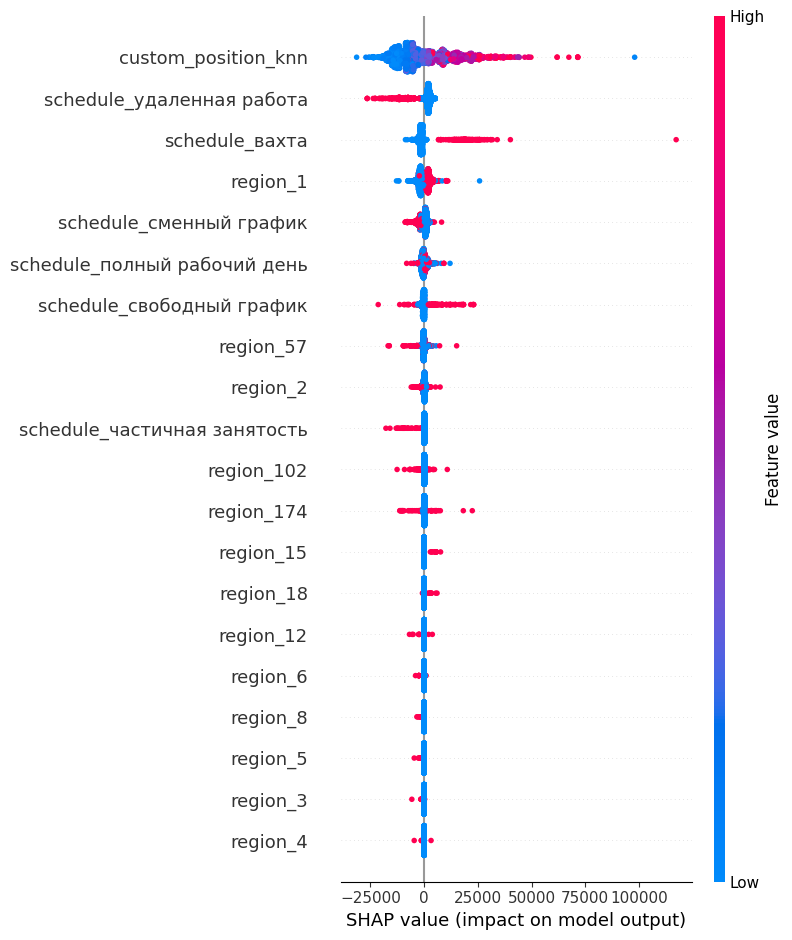

In [ ]:
shap.summary_plot(shap_values, X_test)